In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import string   
import re

In [2]:
data=pd.read_csv('phone_reviews.csv',index_col=0)
data.head()

,mobile_names,asin,body,star
0,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,dont buy product image quality average compar...,1
1,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,lets make one thing clear immediately xiaomi ...,4
2,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,awesome,5
3,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,best buy price display quality amazing compla...,5
4,redmi 9 sky blue 4gb ram 64gb storage 5000 mah...,B08697N43N,bad experience amazon bad camera quality phon...,1


In [3]:
data['star'].value_counts()

5    1004
1     998
4     608
3     364
2     226
Name: star, dtype: int64

In [4]:
# Splitting into train test set

from sklearn.model_selection import train_test_split

x=data['body']
y=data['star']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [5]:
sentence_lengths=x_train.apply(lambda x:len(x.split()))
sentence_lengths.describe()

count    2560.000000
mean       39.319922
std        43.744386
min         0.000000
25%        11.000000
50%        27.000000
75%        51.000000
max       481.000000
Name: body, dtype: float64

In [6]:

    tfidf_vec = TfidfVectorizer()
    x_train_tfidf = tfidf_vec.fit_transform(x_train)
    x_test_tfidf = tfidf_vec.transform(x_test)
     

In [7]:
x_train_tfidf 

<2560x7954 sparse matrix of type '<class 'numpy.float64'>'
	with 83415 stored elements in Compressed Sparse Row format>

In [8]:
x_test_tfidf

<640x7954 sparse matrix of type '<class 'numpy.float64'>'
	with 20357 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [10]:
# Choosing best parameters for random forest
# hyperparameter tuning of random forest classifier using randomized search cross validation

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [12]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [13]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [14]:
# initialise your estimator
clf_rf=RandomForestClassifier(random_state=0)

In [15]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=clf_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,random_state=0)

In [16]:
rf_random.fit(x_train_tfidf,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   24.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [17]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [18]:
prediction_rf=rf_random.predict(x_test_tfidf)

In [19]:
# View accuracy score

accuracy_score(y_test, prediction_rf)

0.7984375

In [20]:
# View confusion matrix for test data and predictions

confusion_matrix(y_test,prediction_rf)

array([[180,   0,   0,   0,  12],
       [ 10,  19,   0,   0,  12],
       [ 10,   0,  49,   0,  23],
       [  2,   0,   0,  61,  54],
       [  6,   0,   0,   0, 202]], dtype=int64)

In [21]:
# View the classification report for test data and predictions

print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           1       0.87      0.94      0.90       192
           2       1.00      0.46      0.63        41
           3       1.00      0.60      0.75        82
           4       1.00      0.52      0.69       117
           5       0.67      0.97      0.79       208

    accuracy                           0.80       640
   macro avg       0.91      0.70      0.75       640
weighted avg       0.85      0.80      0.79       640



In [22]:
prediction_rf

array([5, 1, 5, 3, 1, 3, 1, 5, 1, 4, 5, 5, 4, 4, 1, 5, 2, 5, 5, 1, 5, 5,
       5, 5, 1, 1, 5, 5, 5, 5, 1, 5, 5, 5, 3, 5, 1, 4, 1, 5, 5, 5, 4, 5,
       5, 5, 5, 4, 3, 1, 1, 5, 4, 3, 1, 3, 5, 5, 2, 3, 1, 1, 5, 5, 5, 1,
       1, 1, 1, 5, 1, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 2, 1, 5, 3,
       1, 1, 1, 1, 5, 1, 3, 5, 1, 5, 4, 2, 1, 4, 1, 5, 5, 1, 5, 1, 1, 5,
       1, 5, 1, 1, 1, 3, 1, 4, 5, 5, 5, 3, 5, 1, 5, 1, 1, 5, 5, 5, 5, 1,
       5, 5, 5, 3, 3, 3, 1, 5, 5, 5, 3, 1, 5, 1, 2, 1, 1, 5, 5, 5, 5, 4,
       5, 1, 5, 5, 1, 5, 5, 5, 5, 1, 1, 4, 5, 5, 1, 3, 1, 3, 5, 5, 5, 1,
       5, 5, 1, 2, 1, 1, 1, 5, 5, 5, 1, 5, 4, 1, 5, 4, 1, 1, 5, 5, 5, 1,
       5, 1, 5, 4, 5, 5, 5, 3, 5, 1, 5, 1, 5, 1, 1, 5, 4, 2, 5, 5, 5, 5,
       1, 1, 5, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 5, 1, 5, 5, 3, 5, 4, 1, 5,
       3, 5, 5, 5, 5, 3, 1, 1, 5, 4, 1, 5, 5, 1, 2, 1, 1, 1, 1, 1, 1, 5,
       5, 1, 5, 1, 5, 5, 5, 5, 3, 1, 5, 1, 5, 4, 4, 4, 5, 1, 5, 5, 5, 1,
       5, 5, 4, 3, 1, 5, 3, 5, 1, 5, 3, 4, 1, 5, 5,

In [23]:
# Fitting Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()
# train the model 
nb.fit(x_train_tfidf, y_train)
# make class predictions for X_test_tfidf
prediction_nb = nb.predict(x_test_tfidf)

In [24]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, prediction_nb )

0.7

In [25]:
# print the confusion matrix
metrics.confusion_matrix(y_test,prediction_nb )

array([[185,   0,   0,   0,   7],
       [ 27,   0,   0,   0,  14],
       [ 41,   0,  11,   0,  30],
       [  7,   0,   0,  48,  62],
       [  4,   0,   0,   0, 204]], dtype=int64)

In [26]:
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

           1       0.70      0.96      0.81       192
           2       0.00      0.00      0.00        41
           3       1.00      0.13      0.24        82
           4       1.00      0.41      0.58       117
           5       0.64      0.98      0.78       208

    accuracy                           0.70       640
   macro avg       0.67      0.50      0.48       640
weighted avg       0.73      0.70      0.63       640



C:\Users\Andriya Tiwary\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
prediction_nb

array([5, 1, 5, 5, 1, 5, 1, 5, 5, 4, 5, 5, 4, 5, 1, 5, 1, 5, 5, 1, 5, 5,
       5, 5, 1, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 4, 1, 4, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 1, 1, 5, 5, 3, 1, 1, 3, 5, 1, 3, 1, 1, 5, 5, 1, 1,
       1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 5, 1, 1, 5, 1, 5, 5, 1, 5, 5, 1, 5, 5, 1, 4, 1, 1, 5,
       5, 5, 1, 1, 1, 5, 1, 4, 5, 5, 5, 1, 5, 1, 5, 1, 1, 1, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 1, 1, 1, 1, 5, 4, 5, 5, 5,
       5, 1, 5, 1, 1, 5, 1, 5, 5, 1, 1, 4, 5, 5, 5, 1, 1, 5, 5, 5, 5, 1,
       5, 5, 1, 5, 1, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5, 4, 5, 1, 1, 5, 5, 1,
       5, 1, 5, 5, 5, 5, 1, 1, 5, 1, 5, 1, 5, 5, 1, 5, 1, 1, 1, 5, 5, 5,
       1, 1, 5, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 5, 1, 1, 5, 1, 5, 4, 1, 5,
       5, 4, 5, 5, 5, 5, 1, 1, 5, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 5, 1, 5, 5, 5, 5, 1, 1, 5, 1, 5, 5, 4, 5, 5, 1, 5, 1, 4, 1,
       1, 5, 4, 1, 1, 3, 1, 5, 1, 5, 5, 5, 1, 5, 5,

In [28]:
# instantiate a logistic regression model
logreg = LogisticRegression()

# train the model using x_train_tfidf
logreg.fit(x_train_tfidf, y_train)

# make class predictions for x_test_tfidf
prediction_lr = logreg.predict(x_test_tfidf)

In [29]:
# calculate accuracy
metrics.accuracy_score(y_test, prediction_lr)

0.803125

In [30]:
prediction_lr

array([5, 1, 5, 5, 1, 5, 1, 5, 5, 4, 5, 5, 4, 4, 1, 5, 2, 4, 5, 1, 5, 5,
       5, 5, 1, 1, 3, 5, 5, 5, 1, 5, 5, 5, 4, 5, 1, 4, 1, 4, 5, 5, 4, 5,
       4, 5, 5, 4, 4, 1, 1, 5, 5, 3, 1, 3, 3, 5, 2, 3, 1, 1, 5, 5, 1, 1,
       1, 1, 1, 5, 4, 5, 2, 5, 5, 5, 5, 5, 4, 5, 5, 1, 5, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 3, 1, 3, 5, 1, 4, 4, 1, 5, 4, 1, 5, 5, 1, 4, 1, 1, 5,
       1, 5, 1, 1, 1, 4, 1, 4, 5, 5, 5, 1, 5, 1, 5, 1, 1, 1, 4, 5, 5, 1,
       5, 5, 5, 5, 3, 3, 1, 5, 5, 5, 1, 1, 4, 1, 4, 1, 1, 5, 4, 5, 5, 5,
       5, 1, 5, 1, 1, 5, 1, 5, 5, 1, 1, 4, 5, 5, 5, 1, 1, 3, 5, 5, 5, 1,
       5, 5, 1, 2, 1, 1, 1, 4, 5, 5, 1, 5, 4, 5, 5, 4, 1, 1, 1, 1, 5, 1,
       5, 1, 5, 4, 5, 5, 5, 3, 5, 1, 5, 1, 5, 5, 1, 5, 4, 2, 1, 4, 5, 5,
       1, 1, 5, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 5, 1, 1, 5, 5, 5, 4, 1, 5,
       3, 3, 5, 5, 5, 3, 1, 1, 5, 4, 1, 3, 5, 1, 2, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 5, 1, 5, 5, 5, 5, 3, 1, 5, 1, 5, 5, 4, 4, 5, 1, 5, 5, 4, 1,
       1, 5, 4, 3, 1, 3, 5, 5, 1, 5, 3, 4, 1, 5, 5,

In [31]:
#Support Vector

SVC_classifier = SVC(kernel = 'rbf',random_state=0)
SVC_classifier.fit(x_train_tfidf, y_train)
prediction_svc = SVC_classifier.predict(x_test_tfidf)

In [32]:
metrics.accuracy_score(y_test, prediction_svc)

0.9140625

In [33]:
 prediction_svc

array([4, 1, 5, 3, 1, 3, 1, 5, 5, 4, 5, 5, 4, 4, 1, 5, 2, 4, 5, 1, 5, 2,
       5, 5, 1, 1, 3, 5, 5, 5, 1, 5, 5, 5, 3, 5, 1, 4, 1, 4, 5, 5, 4, 5,
       4, 5, 5, 4, 3, 1, 1, 5, 4, 3, 1, 3, 3, 5, 2, 3, 1, 1, 5, 5, 1, 1,
       1, 1, 1, 5, 1, 5, 2, 5, 5, 5, 3, 5, 4, 5, 5, 1, 5, 1, 2, 1, 5, 3,
       1, 1, 2, 1, 3, 1, 3, 5, 2, 4, 4, 2, 5, 4, 1, 2, 5, 1, 4, 1, 1, 5,
       1, 5, 2, 1, 1, 3, 1, 4, 5, 5, 5, 3, 5, 1, 5, 1, 1, 3, 4, 5, 5, 1,
       5, 5, 5, 3, 3, 3, 1, 4, 5, 4, 3, 1, 4, 1, 2, 1, 1, 5, 4, 3, 5, 4,
       5, 1, 5, 1, 1, 5, 1, 4, 5, 1, 1, 4, 5, 5, 5, 3, 1, 3, 5, 4, 5, 1,
       5, 5, 1, 2, 1, 1, 1, 4, 5, 5, 1, 5, 4, 5, 3, 4, 1, 1, 3, 5, 5, 1,
       5, 1, 5, 4, 5, 5, 5, 3, 5, 1, 5, 1, 5, 5, 1, 5, 4, 2, 1, 4, 5, 5,
       1, 1, 5, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 4, 1, 1, 5, 3, 5, 4, 1, 5,
       3, 4, 5, 5, 5, 3, 1, 1, 5, 4, 1, 3, 5, 1, 2, 1, 1, 1, 1, 1, 1, 5,
       1, 2, 5, 1, 5, 5, 3, 5, 3, 1, 5, 1, 5, 4, 4, 4, 5, 1, 5, 5, 4, 1,
       5, 5, 4, 3, 1, 3, 3, 5, 1, 5, 3, 4, 1, 5, 5,

In [43]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(x_train_tfidf, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.436, total=   2.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.475, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.449, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.422, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.416, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.348, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.355, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.350, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.344, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.607, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.615, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.596, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.609, total=   1.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.605, total=   1.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.363, total=   1.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.385, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.871, total=   1.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.859, total=   1.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.607, total=   1.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.619, total=   1.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.596, total=   1.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.609, total=   1.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.605, total=   1.5s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [44]:
# print best parameter after tuning

print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [45]:
# print how our model looks after hyper-parameter tuning

print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [46]:
grid_predictions = grid.predict(x_test_tfidf)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       192
           2       1.00      0.76      0.86        41
           3       0.99      0.89      0.94        82
           4       0.89      0.84      0.86       117
           5       0.90      0.96      0.93       208

    accuracy                           0.93       640
   macro avg       0.94      0.89      0.91       640
weighted avg       0.93      0.93      0.93       640



In [47]:
metrics.accuracy_score(y_test, grid_predictions)

0.928125

In [34]:
# evaluate gradient boosting algorithm for classification

# define the model
gb = GradientBoostingClassifier(random_state=0)

# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# evaluate the model on the dataset
n_scores = cross_val_score(gb, x_train_tfidf, y_train , scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.811 (0.026)


In [35]:
gb.fit(x_train_tfidf, y_train)

prediction_gb = gb.predict(x_test_tfidf)

In [36]:
metrics.accuracy_score(y_test, prediction_gb)

0.8125

In [37]:
prediction_gb

array([5, 1, 5, 5, 1, 5, 1, 5, 4, 4, 1, 5, 4, 5, 1, 5, 2, 5, 5, 1, 5, 5,
       5, 5, 1, 1, 1, 5, 5, 5, 1, 4, 5, 5, 3, 5, 1, 4, 1, 4, 5, 4, 4, 5,
       5, 5, 5, 4, 3, 1, 1, 5, 4, 3, 1, 3, 1, 5, 2, 3, 1, 1, 5, 5, 1, 1,
       1, 2, 1, 5, 5, 5, 2, 5, 3, 5, 5, 5, 4, 3, 5, 1, 5, 1, 2, 1, 5, 3,
       1, 1, 4, 1, 3, 1, 3, 5, 2, 5, 4, 2, 5, 4, 1, 5, 5, 1, 4, 1, 1, 5,
       1, 5, 1, 1, 1, 3, 1, 4, 5, 5, 5, 3, 5, 1, 5, 1, 1, 1, 4, 5, 5, 1,
       4, 5, 5, 3, 3, 3, 1, 4, 5, 5, 3, 1, 4, 1, 2, 1, 1, 5, 4, 5, 5, 4,
       5, 1, 5, 1, 1, 5, 1, 5, 5, 1, 1, 4, 5, 5, 4, 3, 1, 3, 5, 4, 5, 1,
       5, 5, 1, 2, 1, 1, 1, 4, 5, 5, 1, 5, 4, 5, 5, 4, 1, 1, 1, 5, 5, 1,
       4, 1, 5, 4, 5, 5, 5, 3, 5, 1, 5, 1, 5, 5, 1, 5, 5, 2, 1, 5, 5, 5,
       1, 1, 5, 1, 5, 5, 1, 4, 5, 5, 5, 1, 1, 5, 1, 1, 5, 3, 5, 4, 1, 5,
       3, 1, 1, 5, 5, 3, 1, 1, 5, 4, 1, 5, 5, 1, 2, 1, 1, 1, 1, 1, 1, 5,
       1, 2, 5, 1, 5, 5, 5, 5, 3, 1, 5, 1, 5, 5, 4, 4, 5, 1, 5, 5, 5, 1,
       5, 5, 5, 3, 1, 3, 5, 5, 1, 5, 3, 4, 1, 5, 5,

In [38]:
def sentiment_category(score):
    if score >= 4:
        return "positive"
    elif score <= 2:
        return "negative"
    else:
        return "neutral"

In [39]:
prediction_svc = pd.DataFrame(prediction_svc)   
data['sentiment_score']=prediction_svc
data['review_category']=data['sentiment_score'].apply(lambda x:sentiment_category(x))

Text(0.5, 1.0, 'Distribution of Reviews Category')

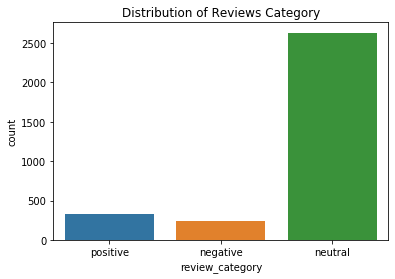

In [40]:
sns.countplot(data['review_category']).set_title("Distribution of Reviews Category")

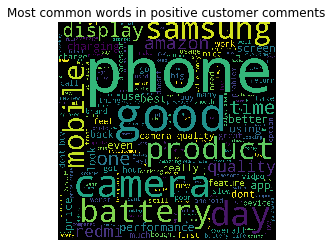

In [41]:
wordcloud = WordCloud(height=4000, width=4000, background_color='black')
wordcloud = wordcloud.generate(' '.join(data.loc[data['review_category']=='positive','body'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()